# Data wrangling project using pandas on a json file


### Use 'Projects funded by world bank' dataset from this link http://jsonstudio.com/resources/ to answer the following questions

#### 1. Find the 10 countries with most projects
#### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')
#### 3. in 2. above you will notice that some entries have only the code and the name is missing. 
####   Create a dataframe with the missing names filled in.

In [1]:
# Import Libraries
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

# Read Data into pandas dataframe and inspect first 5 rows
json_df = pd.read_json('world_bank_projects.json')
json_df.head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


In [2]:
# Inspect Summary Information of data
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

#### Question 1: Find the 10 countries with most projects

In [3]:
# Select the required columns from data frame and inspect first  rows
q1 = json_df[['countryname', 'project_name']]
q1.head()

,countryname,project_name
0,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...
1,Republic of Tunisia,TN: DTF Social Protection Reforms Support
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
3,Republic of Yemen,Gov't and Civil Society Organization Partnership
4,Kingdom of Lesotho,Second Private Sector Competitiveness and Econ...


In [14]:
# select country name from the dataframe, and count number of projects by country name. value_count sorts by descending orders
# use iloc to select top 10 highest values.
q1_count = q1['countryname'].value_counts()
q1_count.iloc[:10]

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [15]:
q1plot = q1_count.iloc[:10]

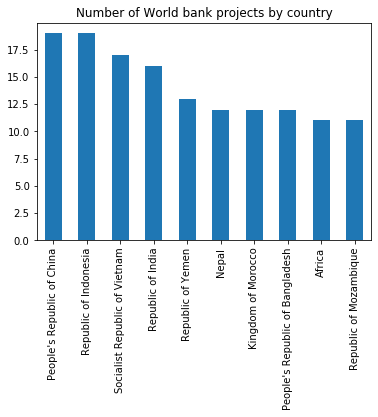

In [17]:
# plot bar chart of 
q1plot.plot.bar(title='Frequency of World bank projects by country')


#### Question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [23]:
#load Jason data as string
json_data = json.load((open('world_bank_projects.json')))                                                              

In [60]:
# Normalize data to create table from nested attribute
json_theme = json_normalize(json_data,'mjtheme_namecode',['countryshortname'])
json_theme.head()

,code,name,countryshortname
0,8,Human development,Ethiopia
1,11,,Ethiopia
2,1,Economic management,Tunisia
3,6,Social protection and risk management,Tunisia
4,5,Trade and integration,Tuvalu


In [61]:
# use groupby on code column to count occurence of themes, since some themes are missing in the table
theme_count = json_theme.groupby('code').count().sort_values('name', ascending=False)
top_theme = theme_count.iloc[:10]
print(top_theme)

      name  countryshortname
code                        
11     250               250
10     216               216
8      210               210
2      199               199
6      168               168
4      146               146
7      130               130
5       77                77
9       50                50
1       38                38


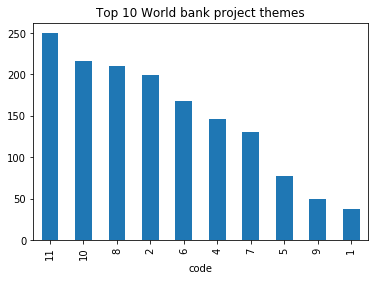

In [62]:
# Plot bar chart of top themes by code using matplotlib
top_theme['countryshortname'].plot.bar(title='Top 10 World bank project themes')

#### Question 3: Fill in missing project theme names

In [69]:
# Replace empty cells in name column with None
json_theme.loc[json_theme['name']=='', 'name']=None

In [71]:
# Sort values by code, and then by name, such that the missing cells are ordered last within the same code. This will ensure
# that we are able to forward fill theme names within the same code names
json_theme = json_theme.sort_values(['code', 'name']).ffill().sort_index()
json_theme.head()

,code,name,countryshortname
0,8,Human development,Ethiopia
1,11,Environment and natural resources management,Ethiopia
2,1,Economic management,Tunisia
3,6,Social protection and risk management,Tunisia
4,5,Trade and integration,Tuvalu
